In [11]:
import numpy as np
import cv2 as cv
from scipy . optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt
%matplotlib inline

Q1

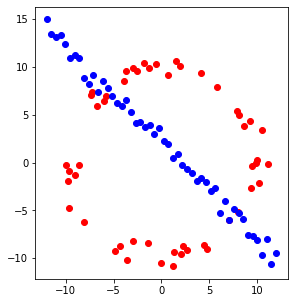

In [36]:
N = 100
half_n = N// 2
r = 10
s = r /16
t = np.random.uniform(0, 2*np.pi, half_n )

n = s*np.random.randn(half_n)
x, y = (r+n)*np.cos(t),(r+n)*np.sin(t)

X_circ = np.hstack((x.reshape(half_n,1), y.reshape(half_n, 1)))

m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n,1) , y.reshape(half_n,1)))

X = np.vstack((X_circ , X_line))

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.plot(X[:50,0],X[:50,1],'o',color='red')
ax.plot(X[50:,0],X[50:,1],'o',color='blue')
ax.set_aspect('equal')

plt.show()

In [14]:
total_points = len(x)
p = 0.99
s = 3
e = 0.5
N = int(np.ceil(np.log(1-p)/np.log(1-((1-e)**s))))

In [37]:
def findCircle(x1, y1, x2, y2, x3, y3) :
	B = (x1**2 + y1**2)*(y2-y3) + (x2**2+y2**2)*(y3-y1) + (x3**2 + y3**2)*(y1-y2)
	A = x1*(y2-y3) - y1*(x2-x3) + x2*y3 - x3*y2
	C = (x1**2 + y1**2)*(x2-x3) + (x2**2 + y2**2)*(x3-x1) + (x3**2 + y3**2)*(x1-x2)
	D = (x1**2 + y1**2)*(x3*y2-x2*y3) + (x2**2 + y2**2)*(x1*y3-x3*y1) + (x3**2+y3**2)*(x2*y1 - x1*y2)
	
	H = B/(2*A)
	K = -C/(2*A)
	R = np.sqrt((B**2 + C**2 - 4*A*D)/(4*(A**2)))
	L = [H,K,R]


	return L

Q2

In [68]:
corners = []
def click(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        corners.append([x,y])
    

img = cv.imread(r"C:\Users\thilanka bandara\Downloads\images\001.jpg")
cv.imshow('image', img)
cv.setMouseCallback('image', click)
cv.waitKey(0)
cv.destroyAllWindows()

In [69]:
height, width = np.shape(img)[0],np.shape(img)[1]
zero_mat = np.array([[0],[0],[0]])

for i in range (4):
    for j in range (2):
        globals()[["x","y"][j]+"_dash_"+str(i+1)] = corners[i][j]

In [70]:
flg = cv.imread(r"C:\Users\thilanka bandara\Downloads\Flag_of_the_United_Kingdom.svg.png")
flg_height , flg_width = np.shape(flg)[0] , np.shape(flg)[1]

x1T = np.array([[0,0,1]])
x2T = np.array([[flg_width-1, 0,1]])
x3T = np.array([[flg_width-1, flg_height-1, 1]])
x4T = np.array([[0,flg_height-1,1]])

In [71]:
for i in range(4):
    a = np.concatenate((zero_mat.T,globals()["x"+str(i+1)+"T"], -globals()["y_dash_"+str(i+1)]*globals()["x"+str(i+1)+"T"]), axis=1)
    b = np.concatenate((globals()["x"+str(i+1)+"T"],zero_mat.T, -globals()["x_dash_"+str(i+1)]*globals()["x"+str(i+1)+"T"]), axis=1)
    if i==0:
        A=np.concatenate((a,b), axis=0, dtype = np.float64)
    else:
        A=np.concatenate((A,a,b), axis=0, dtype = np.float64)

In [72]:
W,V = np.linalg.eig((A.T)@A)
temph = V[:, np.argmin(W)]
H = temph.reshape((3,3))

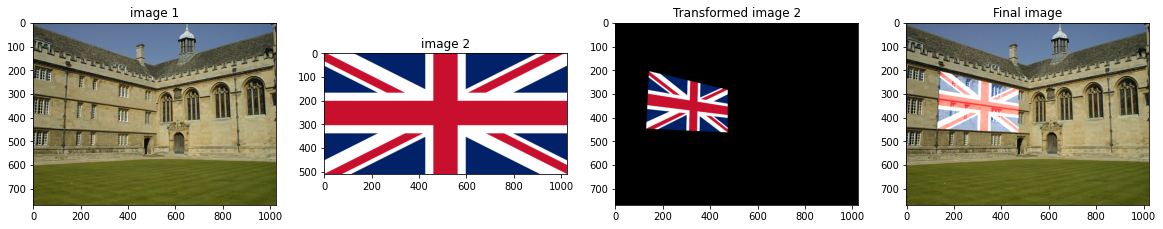

In [73]:
flg_transformed = cv.warpPerspective(flg, H,(width,height))
output = cv.add(flg_transformed,img)

fig, ax = plt.subplots(1,4,figsize=(20,20))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)) ; ax[0].set_title("image 1")
ax[1].imshow(cv.cvtColor(flg, cv.COLOR_BGR2RGB)) ; ax[1].set_title("image 2")
ax[2].imshow(cv.cvtColor(flg_transformed, cv.COLOR_BGR2RGB)) ; ax[2].set_title("Transformed image 2")
ax[3].imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB)) ; ax[3].set_title("Final image")
plt.show()